<a href="https://colab.research.google.com/github/miaomiaoYao/HW/blob/main/CNeuro/CNeuro_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative Analysis of Dendritic Morphology

In [1]:
def swc_reader(filepath):
    # load the data file (.swc)
    import pandas as pd
    colnames = ["segment_index", "segment_type",
                "x", "y", "z",
                "segment_diameter", "father_segment_index"]
    file = pd.read_table(filepath, sep="\s+", names=colnames, header=None)
    return file


In [2]:
def cell_visualization(filename):
    # visualize 3D cell
    import matplotlib.pyplot as plt
    x = filename["x"]
    y = filename["y"]
    z = filename["z"]

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot3D(x, y, z)
    ax.set_title("3d visualization of neurons")
    plt.show()

## load the data file

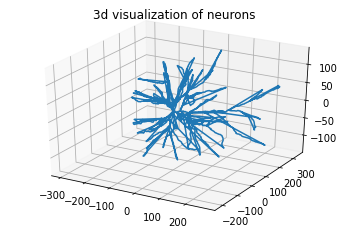

In [5]:
file_arbor = swc_reader("https://raw.githubusercontent.com/miaomiaoYao/HW/main/CNeuro/files/1%20pyramidal%20dendrite.txt")


## plot and visualize neurons

In [ ]:
cell_visualization(file_arbor)